# Single digit recognition problem:
## 0, 1, 2, ... 9?

In [3]:
%run src.ipynb

## Loading data from binary numpy files
Each training data includes a 20 by 20 pixel image of a handwritten digit $0,1,\dots 9$, which translates to a 20 by 20 matrix of floating point numbers ranging from 0 (black) to 255 (white) in grayscale. Each matrix is then unrolled (column after column) to make one training example in the matrix X.

In [8]:
X = np.load("../data/digit-recognition-09/X.npy")
y = np.load("../data/digit-recognition-09/y.npy")
y = y.reshape(-1,)

print(f"X.shape = {X.shape}")
print(f"Y.shape = {y.shape}")

X.shape = (5000, 400)
Y.shape = (5000,)


## Display the the corresponding images
Here we convert each training data back to a 20 by 20 matrix and show it on a grayscale.

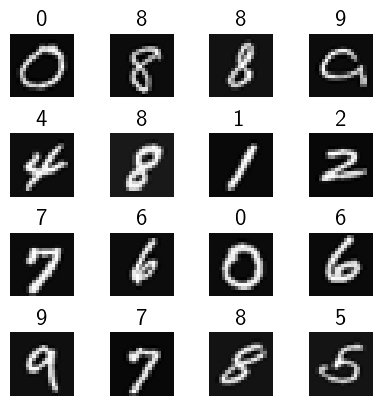

In [9]:
m,_ = X.shape

fig, ax = plt.subplots(4, 4, figsize=(4, 4))
fig.tight_layout(pad=0.1)
for a in ax.flat:
    random_index = np.random.randint(m)# pick a random training data
    X_random = X[random_index].reshape((20,20)).T
    a.imshow(X_random, cmap='gray')
    a.set_title(y[random_index])
    a.set_axis_off()

plt.show()

## Normalize the data using keras

In [11]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X).numpy()

## Creat a neural network
Let's consider 2 hidden layers with, respectively, 25 and 15 ReLU units, and an output linear layer with 10 units. The output layer data will be later used to calculate probabilities using softmax.

In [21]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation='relu', name = "L1"),
    Dense(units=15, activation='relu', name = "L2"),
    Dense(units=10, activation='linear', name = "L3")
])

W1, b1 = model.get_layer("L1").get_weights()
print(f"W1.shape = {W1.shape}; b1.shape = {b1.shape}")
print(f"W1 =\n{W1}\nb1 =\n {b1}")

model.summary()

W1.shape = (400, 25); b1.shape = (25,)
W1 =
[[-0.0288656  -0.10819109 -0.0578481  ...  0.00699291 -0.08886455
   0.02452549]
 [ 0.0650088  -0.11399112 -0.00909867 ... -0.03362793 -0.09758235
   0.00508142]
 [-0.09526198 -0.03168764 -0.06162379 ...  0.05926324 -0.09822217
   0.10333878]
 ...
 [-0.08036262 -0.0110442  -0.05418896 ... -0.10108985 -0.00569816
  -0.05485869]
 [ 0.00955294 -0.00461687  0.00564768 ... -0.00317343  0.03141789
  -0.0387153 ]
 [-0.07572598  0.02168711 -0.05360165 ...  0.10538109 -0.1075588
  -0.05370627]]
b1 =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                             

## Compile with Adam optimization

In [22]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
history = model.fit(
    Xn,y,            
    epochs=20,
)

Epoch 1/20
157/157 [==============================] - 0s 719us/step - loss: 1.5625
Epoch 2/20
157/157 [==============================] - 0s 724us/step - loss: 0.5461
Epoch 3/20
157/157 [==============================] - 0s 741us/step - loss: 0.3180
Epoch 4/20
157/157 [==============================] - 0s 717us/step - loss: 0.2369
Epoch 5/20
157/157 [==============================] - 0s 743us/step - loss: 0.1918
Epoch 6/20
157/157 [==============================] - 0s 764us/step - loss: 0.1614
Epoch 7/20
157/157 [==============================] - 0s 731us/step - loss: 0.1387
Epoch 8/20
157/157 [==============================] - 0s 779us/step - loss: 0.1186
Epoch 9/20
157/157 [==============================] - 0s 875us/step - loss: 0.1026
Epoch 10/20
157/157 [==============================] - 0s 841us/step - loss: 0.0900
Epoch 11/20
157/157 [==============================] - 0s 764us/step - loss: 0.0791
Epoch 12/20
157/157 [==============================] - 0s 757us/step - loss: 0.0701
E

## Inspect the cost versus iteration

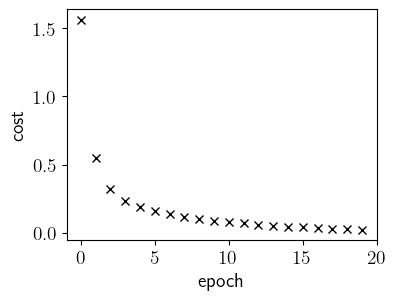

In [34]:
plt.figure(figsize=[4, 3])
plt.plot(history.history['loss'],'xk')
plt.xlabel('epoch')
plt.xticks(np.linspace(0,20,5))
plt.ylabel('cost')
plt.show()

## Prediction accuracy

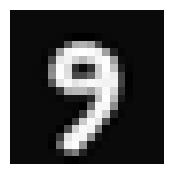

 Prediction: 
[[-11.161866   -9.848225   -8.138621    2.8026373  -8.4437685   0.5489202
  -11.050059    5.679577   -4.3903537  10.462253 ]]
 Largest prediction index: 9


In [64]:
def display_digit(X):
    plt.figure(figsize=[2, 2])
    plt.imshow(X.reshape((20,20)).T, cmap='gray')
    plt.axis('off')
    plt.show()


m = X.shape[0]
index = np.random.randint(m)
display_digit(X[index])

p = model.predict(norm_l(X[index]).numpy().reshape(1,400), verbose = 0)

print(f" Prediction: \n{p}")
print(f" Largest prediction index: {np.argmax(p)}")

## Finding the probabilities

In [56]:
prob = tf.nn.softmax(p)

print(f"Probabilities: \n{prob}")
print(f"Largest probability index: {np.argmax(prob)}")
print(f"Sum of probabilities = {np.sum(prob)}")

Probabilities: 
[[1.1680611e-16 2.1707496e-10 9.9993491e-01 6.5059430e-05 5.7147909e-10
  6.8021875e-14 4.3646184e-09 5.6308905e-11 7.1906020e-10 4.0559075e-12]]
Largest probability index: 2
Sum of probabilities = 1.0


In [54]:
p = model.predict(Xn, verbose = 0)
predict = np.zeros(len(p))
for i in range(len(p)):
        predict[i] = np.argmax(p[i])
        
print(f"The training accuracy is {np.mean(predict == y)*100}%")

The training accuracy is 99.76%


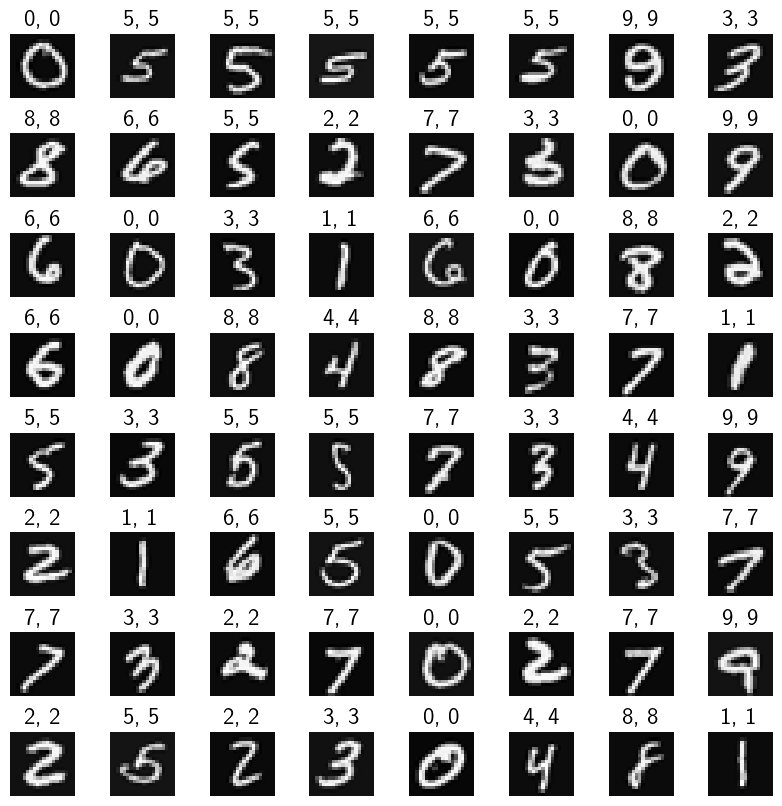

In [59]:
m,_ = X.shape

fig, ax = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)
for a in ax.flat:
    random_index = np.random.randint(m)# pick a random training data
    X_random = X[random_index].reshape((20,20)).T
    a.imshow(X_random, cmap='gray')
    prob = 0
    p = model.predict(Xn[random_index].reshape(1,400),verbose = 0)
    predict = np.argmax(p)
        
    a.set_title(f"{y[random_index]}, {predict}")
    a.set_axis_off()
